In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:07<00:00, 238MB/s]
100% 1.06G/1.06G [00:07<00:00, 146MB/s]


In [3]:
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [4]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import regularizers, layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
data_augmentation = Sequential([layers.RandomFlip("horizontal"),layers.RandomRotation(0.1),layers.RandomZoom(0.1)])

model = Sequential()

data_augmentation,
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(120, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,595,313 (36.60 MB)

 Trainable params: 9,594,865 (36.60 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(train_ds, epochs=100, validation_data=validation_ds,callbacks=[EarlyStopping(patience=5)])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.6056 - loss: 1.5267 - val_accuracy: 0.7240 - val_loss: 1.1746
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7136 - loss: 1.1793 - val_accuracy: 0.7686 - val_loss: 1.0588
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7512 - loss: 1.0573 - val_accuracy: 0.7908 - val_loss: 0.9616
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.7913 - loss: 0.9273 - val_accuracy: 0.8016 - val_loss: 0.8452
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.8120 - loss: 0.7962 - val_accuracy: 0.8124 - val_loss: 0.7401
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8373 - loss: 0.6804 - val_accuracy: 0.8316 - val_loss: 0.6500
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 43ms/step - accuracy: 0.8612 - loss: 0.5806 - val_accuracy: 0.8242 - val_loss: 0.6287
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8753 - loss: 0

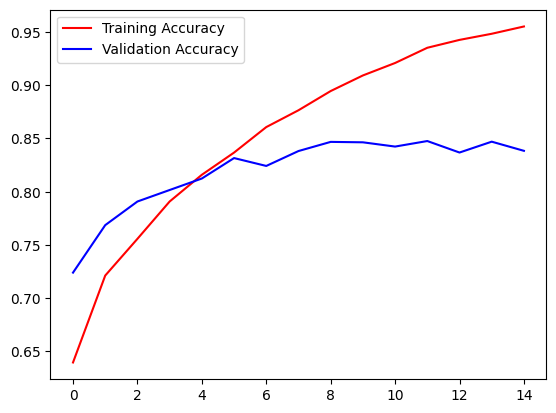

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.legend()
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step
[[0.9996843]]


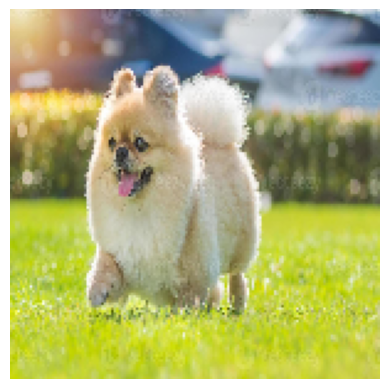

In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('/content/dog.jpg', target_size=(150,150))
img_array = image.img_to_array(img) / 255.0
test_input = np.expand_dims(img_array, axis=0)

prediction = model.predict(test_input)
print(prediction)

plt.imshow(img)
plt.axis('off')
plt.show()

In [14]:
if prediction[0][0] >= 0.5:
    print("Dog")
else:
    print("Cat")

Dog


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.00057192]]


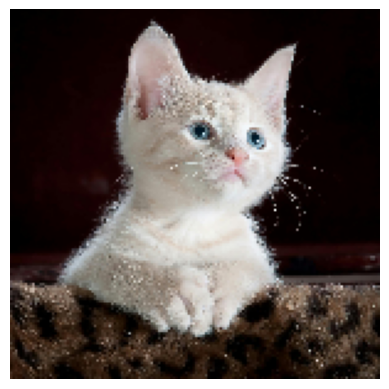

In [15]:
img = image.load_img('/content/cat.jpeg', target_size=(150,150))
img_array = image.img_to_array(img) / 255.0
test_input = np.expand_dims(img_array, axis=0)

prediction = model.predict(test_input)
print(prediction)

plt.imshow(img)
plt.axis('off')
plt.show()

In [36]:
if prediction[0][0] >= 0.5:
    print("Dog")
else:
    print("Cat")

Cat


In [29]:
from tensorflow.keras.applications import VGG16 ,Xception

conv_base = Xception(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3),
    pooling='avg'
)

In [30]:
conv_base.trainable = False

In [31]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(train_ds, epochs=100, validation_data=validation_ds,callbacks=[EarlyStopping(patience=0)])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.9148 - loss: 0.1962 - val_accuracy: 0.9700 - val_loss: 0.0813
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9634 - loss: 0.0953 - val_accuracy: 0.9698 - val_loss: 0.0775
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9679 - loss: 0.0794 - val_accuracy: 0.9718 - val_loss: 0.0756
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 74ms/step - accuracy: 0.9746 - loss: 0.0681 - val_accuracy: 0.9716 - val_loss: 0.0755
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - accuracy: 0.9737 - loss: 0.0654 - val_accuracy: 0.9710 - val_loss: 0.0760


In [34]:
validation_loss, validation_accuracy = model.evaluate(validation_ds)

print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.9708 - loss: 0.0764
Validation Loss: 0.07604020088911057
Validation Accuracy: 0.9710000157356262


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.01092569]]


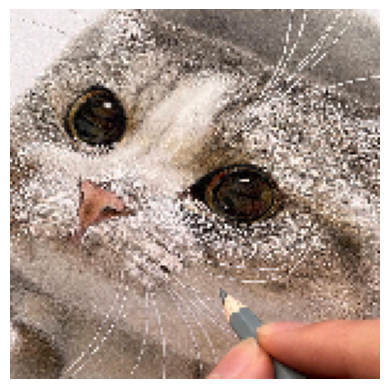

In [42]:
img = image.load_img('/content/hand_drawn.jpg', target_size=(150,150))
img_array = image.img_to_array(img) / 255.0
test_input = np.expand_dims(img_array, axis=0)

prediction = model.predict(test_input)
print(prediction)

plt.imshow(img)
plt.axis('off')
plt.show()

In [43]:
if prediction[0][0] >= 0.5:
    print("Dog")
else:
    print("Cat")

Cat


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0.9999833]]


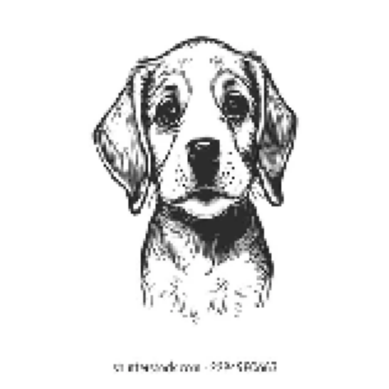

In [40]:
img = image.load_img('/content/hand_drawn_dog.jpg', target_size=(150,150))
img_array = image.img_to_array(img) / 255.0
test_input = np.expand_dims(img_array, axis=0)

prediction = model.predict(test_input)
print(prediction)

plt.imshow(img)
plt.axis('off')
plt.show()

In [41]:
if prediction[0][0] >= 0.5:
    print("Dog")
else:
    print("Cat")

Dog
